# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from scipy import stats

# Import API Key
from api_keys import weather_api_key

# Import Citipy module for random city generation
from citipy import citipy

## Generate Cities List

In [3]:
# Create empty list for holding city names and lat/long coordinates
city_names = []
latlongs = []

# Generate random latitude and longitude combinations before for loop
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
longs = np.random.uniform(low=-180.000, high=180.000, size=2000)

# Use zip to make an iterator for the for loop
latlongs = zip(lats, longs)

# Use for loop to iterate through latlongs, and find the nearest city
for latlong in latlongs:
    city = citipy.nearest_city(latlong[0], latlong[1]).city_name
    
    # Append to list of cities if unique (to avoid repeating cities)
    if city not in city_names:
        city_names.append(city)
        
# Check if there are sufficient cities (> 500)
len(city_names)

742

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL and add units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create the lists we will need to append to for the dataframe
cities = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Initialise counters
set_count = 1
record_count = 1


print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the city names and make the query url for each city - enumerate makes each item in city_names numerical, which is needed to get request the OpenWeatherAPI
for i, city in enumerate(city_names):
    
    # Use modulo to ensure that the records are printed in groups of 50's
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Make the query url
    query_url = url + "units=" + units + "&appid=" + weather_api_key + "&q=" + city
         
    # Get request the json
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Increase record count for next loop
    record_count += 1
    
   # Append the necessary items to a list and add an exception for when a city can't be found
    try:       
        cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | faya
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | puerto escondido
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | umea
Processing Record 20 of Set 1 | ucar
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | muros
Processing Record 23 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Put the data into a dataframe
city_data_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

# Export the city data into a csv file
city_data_df.to_csv("output_data/cities.csv")

# Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,77.00,94,90,10.29,TO,1601455782
1,Faya,18.39,42.45,78.80,14,3,4.70,SA,1601455988
2,Tasiilaq,65.61,-37.64,30.20,80,70,6.93,GL,1601455799
3,Bathsheba,13.22,-59.52,82.40,83,20,21.92,BB,1601455988
4,Puerto Escondido,15.85,-97.07,77.16,78,96,6.04,MX,1601455989


In [6]:
# Inspect the data by using the describe function
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,6.810000e+02
mean,17.988473,22.156432,65.709236,70.415565,53.453744,8.082085,1.601456e+09
std,33.016435,90.318117,16.697938,21.567111,38.711656,5.549734,1.105022e+02
min,-54.800000,-175.200000,13.770000,8.000000,0.000000,0.380000,1.601456e+09
25%,-8.930000,-58.650000,53.600000,60.000000,10.000000,4.030000,1.601456e+09
50%,18.480000,27.910000,67.500000,75.000000,62.000000,6.930000,1.601456e+09
75%,46.420000,102.280000,78.800000,87.000000,90.000000,11.030000,1.601456e+09
max,78.220000,178.420000,103.550000,100.000000,100.000000,38.030000,1.601456e+09


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Find values of Q1 - 1.5 x IQR and Q3 + 1.5 x IQR by using the 75% (Q3) and 25% (Q1) values
city_data_qvalues = city_data_df["Humidity"].quantile([.25, .75])
Q1 = city_data_qvalues[0.25]
Q3 = city_data_qvalues[0.75]
IQR = Q3-Q1
lower_lim = Q1-IQR
upper_lim = Q3+IQR

# Finding the index of the outliers 
index = city_data_df[(city_data_df["Humidity"] >= upper_lim)|(city_data_df["Humidity"] <= lower_lim)].index

# Drop the indexes of the outliers
clean_city_data_df = city_data_df.drop(index, inplace=False)

# Describe to check if it dropped the correct rows
clean_city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,6.180000e+02
mean,17.968091,21.160000,64.405971,75.294498,57.076052,7.869854,1.601456e+09
std,33.570435,92.747541,16.398641,15.814791,37.546846,5.490973,1.120587e+02
min,-54.800000,-175.200000,13.770000,34.000000,0.000000,0.380000,1.601456e+09
25%,-8.447500,-63.055000,52.225000,65.000000,20.000000,3.870000,1.601456e+09
50%,17.360000,23.090000,66.200000,77.000000,72.500000,6.930000,1.601456e+09
75%,47.730000,108.467500,78.235000,87.000000,91.750000,10.290000,1.601456e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,38.030000,1.601456e+09


In [8]:
# Display the cleaned data frame
clean_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,77.00,94,90,10.29,TO,1601455782
2,Tasiilaq,65.61,-37.64,30.20,80,70,6.93,GL,1601455799
3,Bathsheba,13.22,-59.52,82.40,83,20,21.92,BB,1601455988
4,Puerto Escondido,15.85,-97.07,77.16,78,96,6.04,MX,1601455989
5,Saskylakh,71.92,114.08,27.28,94,50,1.86,RU,1601455808


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

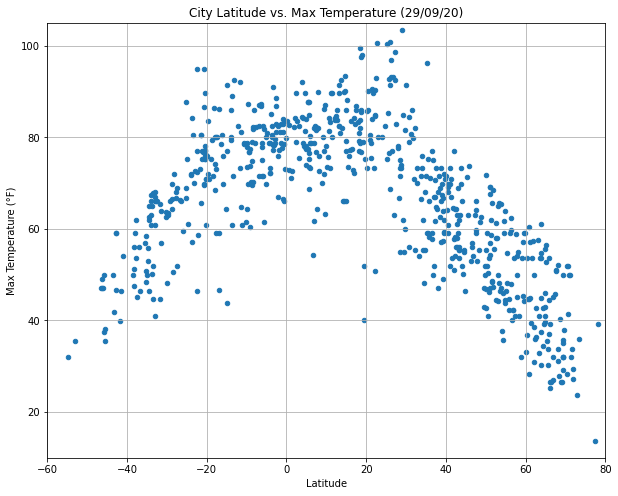

In [9]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Max Temp", xlim=(-60, 80), ylim=(10,105), grid=True, title="City Latitude vs. Max Temperature (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.savefig("output_data/LatvsMaxTemp.png")
plt.show()

The above figure plots City Latitude vs Maximum Temperature. It shows us that on the 29/09, when the city is closer to the equator (closer to a latitude of 0), the maximum temperature is generally higher.

## Latitude vs. Humidity Plot

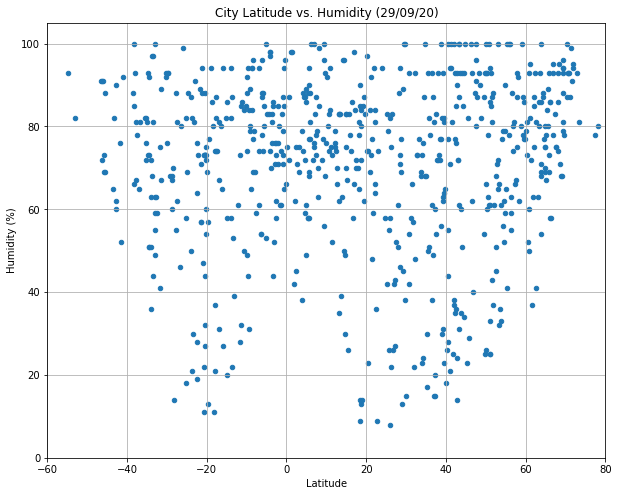

In [10]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Humidity", xlim=(-60, 80), ylim=(0,105), grid=True, title="City Latitude vs. Humidity (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/LatvsHumidity.png")
plt.show()

The above figure plots City Latitude vs Humidity (%). Humidity is a representation of how much moisture is in the air, it is the % that the air is saturated with water. 100% humidity indicates that the air has reached its capacity to hold water. There appears to be no correlation in the data.

## Latitude vs. Cloudiness Plot

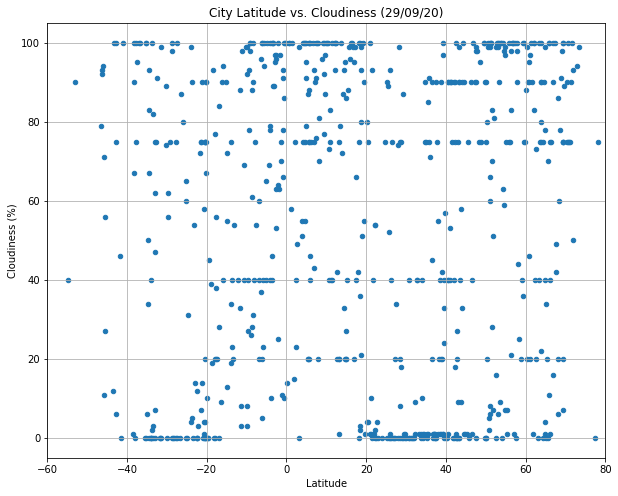

In [11]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Cloudiness", xlim=(-60, 80), ylim=(-5,105), grid=True, title="City Latitude vs. Cloudiness (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/LatvsCloudiness.png")
plt.show()

The above figure plots latitude of cities in the dataset with today's cloudiness (%). Cloudiness is a measure of how much cloud cover there is at a given location. There doesn't appear to be a relation between Cloudiness and Latitude.

## Latitude vs. Wind Speed Plot

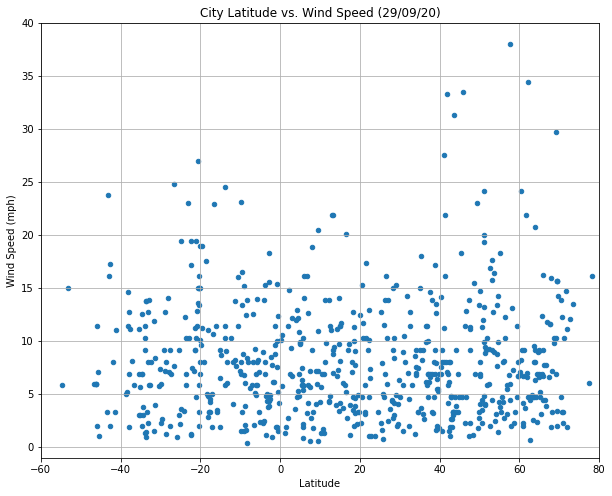

In [33]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Wind Speed", xlim=(-60, 80), ylim=(-1,40), grid=True, title="City Latitude vs. Wind Speed (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/LatvsWindSpeed.png")
plt.show()

The above figure plots wind latitude against wind speed (mph). There doesn't appear to be a relationship between the two variables.

## Linear Regression

In [13]:
# Split the DataFrame into two separate dataframes (one for north and one for south)

north_df = city_data_df[city_data_df["Lat"] > 0]

south_df = city_data_df[city_data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8236214497633539
The r-squared value is: 0.678352292510289


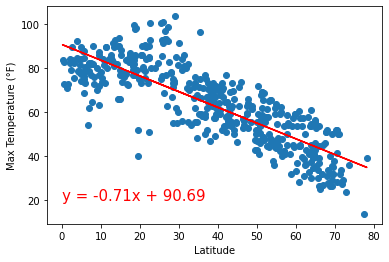

In [14]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7432867152727737
The r-squared value is: 0.5524751411009893


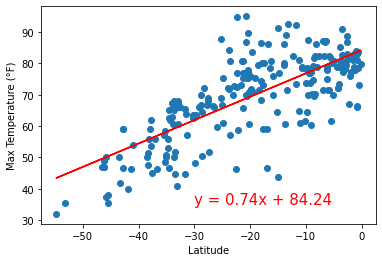

In [31]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

The graphs above show that the r value for the northern hemisphere shows a stronger correlation (albeit negative) between latitute and max temperature than the southern hemisphere data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10697322230851763
The r-squared value is: 0.011443270291067535


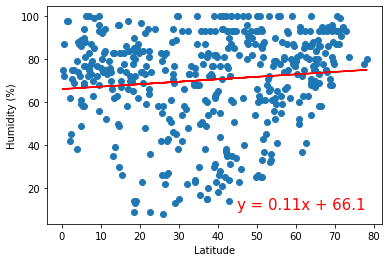

In [30]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.009342009006077477
The r-squared value is: 8.72731322696327e-05


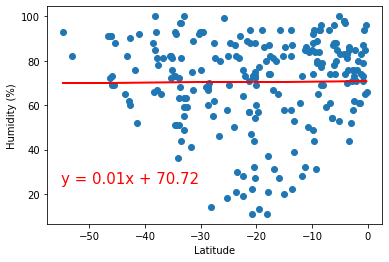

In [29]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

Both the northern and southern hemisphere data show no correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.015593087542854017
The r-squared value is: 0.00024314437911910914


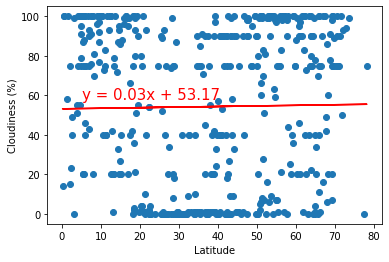

In [28]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,58),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14711204973051373
The r-squared value is: 0.021641955175913143


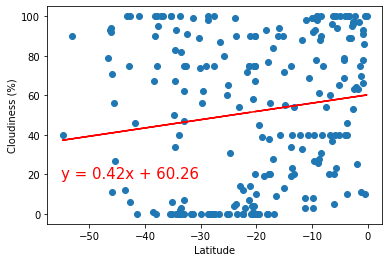

In [25]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

Cloudiness shows almost no correlation with latitude in either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08843187240637616
The r-squared value is: 0.007820196057297593


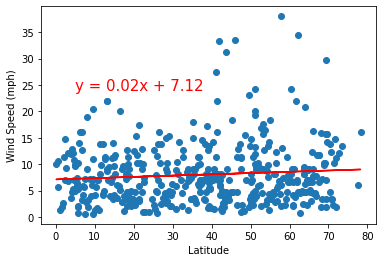

In [32]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,24),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.029268713506168
The r-squared value is: 0.0008566575903061412


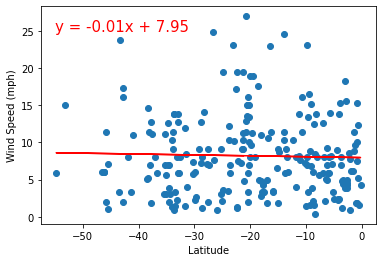

In [22]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

Latitude and wind speed are not correlated for either hemisphere.